<a href="https://colab.research.google.com/github/SHUBHAM54444/CAPSTAN_PROJECT5444/blob/main/ML_Retail_Sales_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -

##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **NAME**            - Shubham Raju Kadu

# **Project Summary -**

This dataset is live dataset of Rossmann Stores.On analsysing this problem we observe that Rossmann problem is a regression problem and our primarily goals to predict the sales figures of Rossmann problem.In this Notebook we work on following topics

Analysing the dataset by using Exploratory Data Analysis using exponential moving avarages analyse trends and seasonality in Roseman dataset. we use 1) Linear Regression 2) ElasticNet Regression 3) Decision Tree Regression

By applying above algorthim we find accuracy of dataset(ndf) is 78% by Decision Tree Regression

By applying above algorthim we find accuracy of dataset(df) is 86% by Decision Tree Regression


# **GitHub Link -**

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries.Currently, Rossmann store managers are tasked with predicting their daily
sales for up to six weeks in advance.Store sales are influenced y many factors ,including promotions, compeition,school and state holidays,seasonlity and locality. with thousands of individul managers predicting sales based on thair unique cirucumstance,the accuracy of the results can be quite varide.you are provided with histroical sales data for 1115 rossmann stores. The task is forecast the sales column for the test set. Note the some stores in the dataset were temporarilly closed for refurbishment.Data discription Rossmann stores Data.csv- historical data including sales store.csv-supplemental information about the stores data fileds most of the fileds are self-explanatory, id-an id that represents a (store,Da,te)duple within set store-a unique id for each stores sales -the turnover for any given day (dependent variable)
Customer-the number of customers on given day

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [106]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import datetime
%matplotlib inline
import seaborn as sns 
import plotly.express as px 
import ast
import math 
import random
import pickle
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge ,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import skew 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [107]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
sales_df=pd.read_csv("/content/drive/MyDrive/SRK/Rossmann Stores Data.csv")

store_df=pd.read_csv("/content/drive/MyDrive/SRK/store.csv")

### Dataset First View

In [109]:
# sales_df had 1017209 row & 9 columns

sales_df.shape

(1017209, 9)

In [110]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [111]:
# store_df 1115 row & 10 columns

store_df.shape

(1115, 10)

In [112]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Information

In [113]:
# take info of both dataset
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [114]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [115]:
# find duplicated value sales dataset 
len(sales_df[sales_df.duplicated()])

0

In [116]:
# find duplicated value store  dataset 
len(sales_df[sales_df.duplicated()])

0

#### Missing Values/Null Values

In [117]:
# missing value of sales dataset
print(sales_df.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [118]:
# missing value of store dataset
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<Axes: >

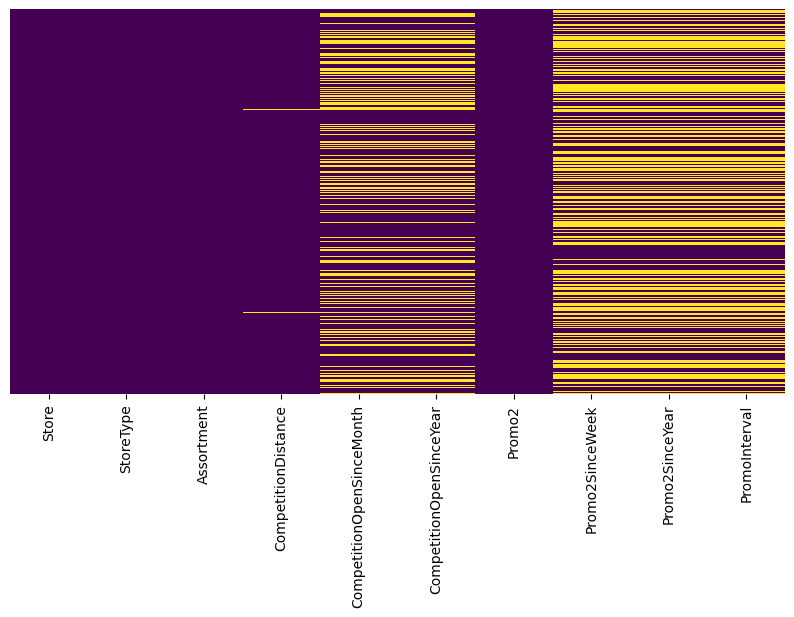

In [119]:
# we can use heatmap for visualization null values.
# yellow color is represent null values in each columns.
plt.figure(figsize=(10,5))
sns.heatmap(store_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


## ***2. Understanding Your Variables***

In [120]:
#sales dataset columns
sales_df.columns


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [121]:
#store data columns
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [122]:
#sales dataset describe
sales_df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [123]:
#store dataset describe
store_df.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


### Variables Description 

**id-** unique entry id


**Store-** a unique id for each store


**Sales-** the turnover for any given day(dependent variabel)

**Customers-** the number of customers on a given day

**Open-** an indicator for whether the store is open(open=1,closed=0)

**StateHoliday-** indiacate state holiday.Normally all store with few exception are closed on state holidays.Note that all schools are closed on public holidays and weekends,a=public holiday, b=Easter holiday, c=Christmas,0=None

**SchoolHoliday-**indicate if the (store,date) was affected by closure of public schools

**Store type**-differentiates between 4 differnt store models:a,b,c,d

**Assortment-** describes an assortment level-a=basic,b=extra,c=extended

**CompetitionDistance-**distance in meter nearest compititor store

**CompetitionOpenSince[month/year]-** gives the approximate year and month of the time the nearest compitition was opened

**Promo-**indicates whether a store is running a promo on the day

**Promo2-** promo2 is countinuing and consecutive promotion for some store:0=store is not participating,1=store is participiting

**Promo2since(year/week)-**describe the year and calender week when the store started participating in promo2

**PromoInterval-** describe the consecutive interval promo2 is started,naming the months the promotion is started a new.




### Check Unique Values for each variable.

In [124]:
# Check Unique Values for each variable in seals dataset.
for i in sales_df.columns.tolist():
  print("No. of unique values in ",i,"is",sales_df[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  DayOfWeek is 7 .
No. of unique values in  Date is 942 .
No. of unique values in  Sales is 21734 .
No. of unique values in  Customers is 4086 .
No. of unique values in  Open is 2 .
No. of unique values in  Promo is 2 .
No. of unique values in  StateHoliday is 5 .
No. of unique values in  SchoolHoliday is 2 .


In [125]:
# Check Unique Values for each variable in store dataset.
for i in store_df.columns.tolist():
  print("No. of unique values in ",i,"is",store_df[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  StoreType is 4 .
No. of unique values in  Assortment is 3 .
No. of unique values in  CompetitionDistance is 654 .
No. of unique values in  CompetitionOpenSinceMonth is 12 .
No. of unique values in  CompetitionOpenSinceYear is 23 .
No. of unique values in  Promo2 is 2 .
No. of unique values in  Promo2SinceWeek is 24 .
No. of unique values in  Promo2SinceYear is 7 .
No. of unique values in  PromoInterval is 3 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [126]:
# chake percentage of null values in store dataset each columns.
store=store_df.isnull().sum()/len(store_df) 
print(store)

Store                        0.000000
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.002691
CompetitionOpenSinceMonth    0.317489
CompetitionOpenSinceYear     0.317489
Promo2                       0.000000
Promo2SinceWeek              0.487892
Promo2SinceYear              0.487892
PromoInterval                0.487892
dtype: float64


In [127]:
# in store dataset six columns have null values we fill this null value in (0).
store_df['CompetitionOpenSinceMonth'].fillna(0,inplace=True)    
store_df['CompetitionDistance'].fillna(0,inplace=True) 
store_df['CompetitionOpenSinceYear'].fillna(0,inplace=True) 
store_df['Promo2SinceWeek'].fillna(0,inplace=True) 
store_df['Promo2SinceYear'].fillna(0,inplace=True) 
store_df['PromoInterval'].fillna(0,inplace=True) 


In [128]:
# so we can see not null value present in store dataset 
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [129]:
# Now we merge both dataset sales_df & store_df and creat new dataset df
df=pd.merge(sales_df,store_df,on="Store",how="left")

In [130]:
# new dataset had 1017209 row and 18 columns
df.shape

(1017209, 18)

In [131]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [133]:
# some columns datatype is object we replace object value into int and convert datatype 
df['StateHoliday'].replace(["0","a","b","c"],[0,1,2,3],inplace=True)
df['StoreType'].replace(['a',"b","c","d"],[0,1,2,3],inplace=True)
df["Assortment"].replace(["a","b","c"],[0,1,2],inplace=True)

In [134]:
# we convert all float data type in to int
df["CompetitionOpenSinceYear"] = df['CompetitionOpenSinceYear'].astype(int)
df['Promo2SinceYear']=df['Promo2SinceYear'].astype(int)
df['CompetitionDistance']=df['CompetitionDistance'].astype(int)
df['Promo2SinceWeek']=df['Promo2SinceWeek'].astype(int)
df['CompetitionOpenSinceMonth']=df["CompetitionOpenSinceMonth"].astype(int)

In [135]:
# change date columns datatype
df['Date']=pd.to_datetime(df['Date'],format = "%Y-%m-%d")

In [136]:
df['CompetitionOpenSinceMonth']=pd.DatetimeIndex(df['Date']).month

In [137]:
# sales value counts
# in this dataset 172871 row had a zero sales
df['Sales'].value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64

In [138]:
# we assume this 172817 store are themporily closed
df['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [139]:
# so we drop those row thair sales is (0) & store are temporily closed
ndf=df.drop(df[(df.Open == 0) & (df.Sales==0)].index)

In [140]:
# so now new dataset had 844392 row & 18 columns
ndf.shape

(844392, 18)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

<Axes: xlabel='Sales', ylabel='Density'>

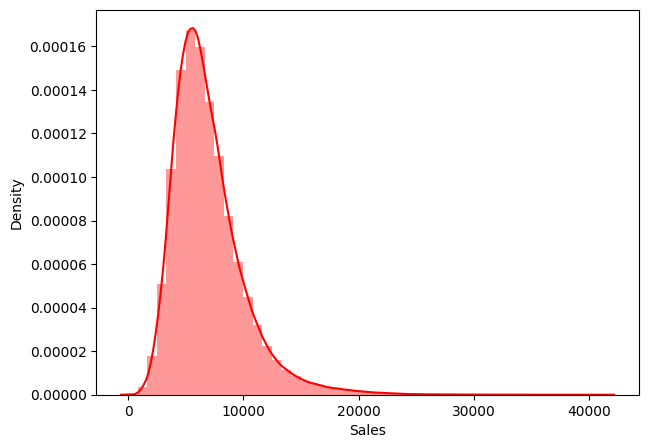

In [141]:
#  we plot distribution graph for  (ndf) dataset dependent variable (Sales)
plt.figure(figsize=(7,5))
sns.distplot(ndf['Sales'],color="r")

Now we plot graph  after drop those row thair sales is zero  and store are themporily closed now we seen squed disriution of dependent variabels 

Now we get (df) dataset for EDA

Text(0.5, 1.0, 'plot between Sales and storetype')

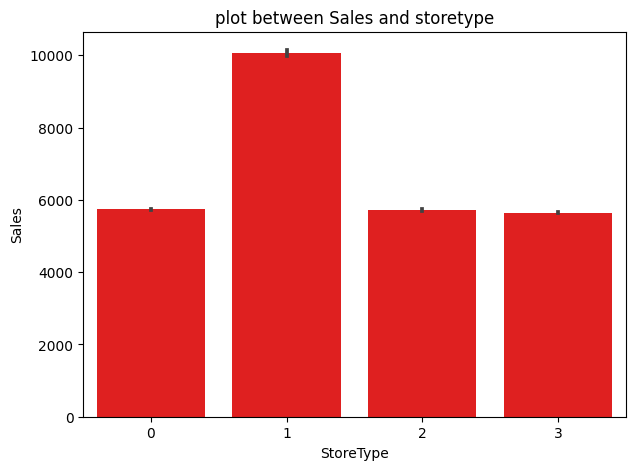

In [142]:
plt.figure(figsize=(7,5))
sns.barplot(x='StoreType',y="Sales",data=df,color='Red')
plt.title('plot between Sales and storetype')

Text(0.5, 1.0, 'plot between Sales and DayOfWeek')

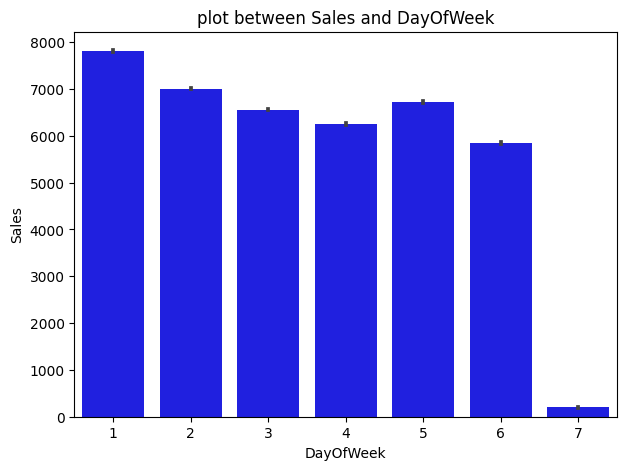

In [143]:
plt.figure(figsize=(7,5))
sns.barplot(x='DayOfWeek',y="Sales",data=df,color='Blue')
plt.title('plot between Sales and DayOfWeek')

Text(0.5, 1.0, 'plot between Sales and sales')

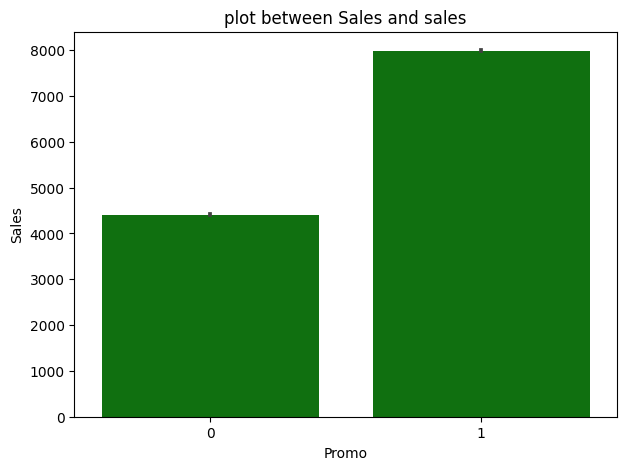

In [144]:
plt.figure(figsize=(7,5))
sns.barplot(x='Promo',y="Sales",data=df,color='Green')
plt.title('plot between Sales and sales')

Text(0.5, 1.0, 'plot between Sales and CompetitionOpenSinceYear')

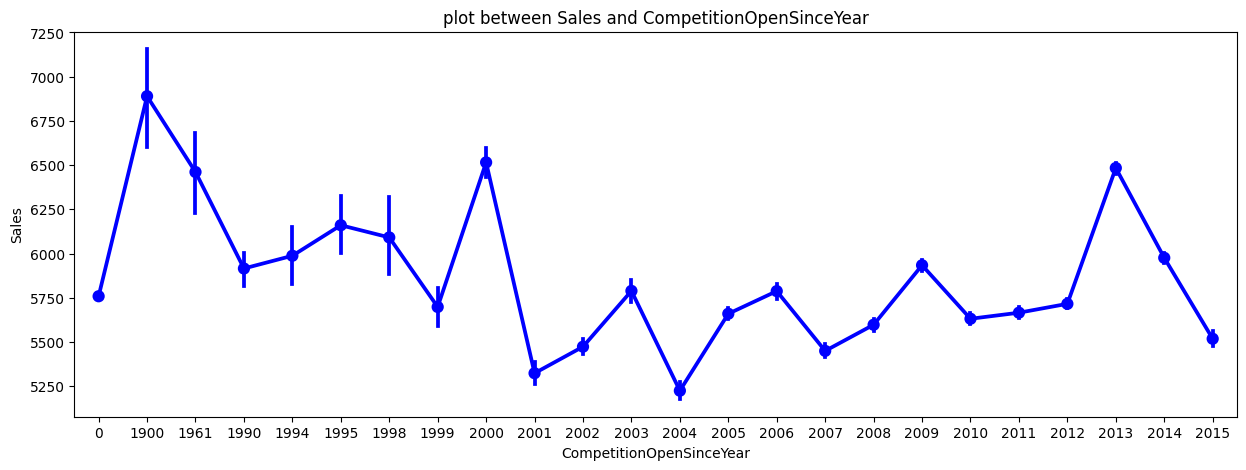

In [145]:
plt.figure(figsize=(15,5))
sns.pointplot(x='CompetitionOpenSinceYear',y="Sales",data=df,color='Blue')
plt.title('plot between Sales and CompetitionOpenSinceYear')

Text(0.5, 1.0, 'plot between Sales and StateHoliday')

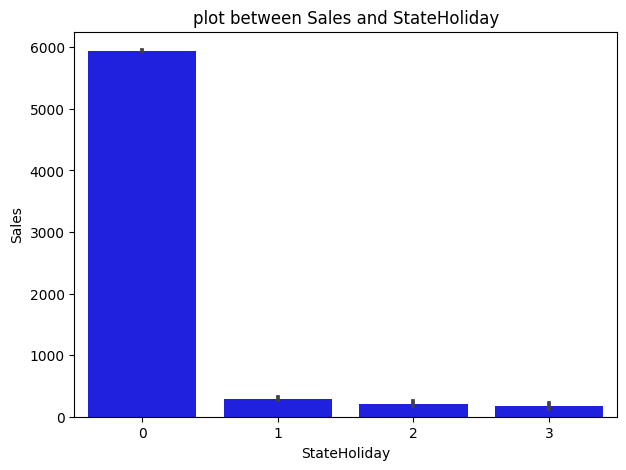

In [146]:
plt.figure(figsize=(7,5))
sns.barplot(x='StateHoliday',y="Sales",data=df,color='Blue')
plt.title('plot between Sales and StateHoliday')

Text(0.5, 1.0, 'plot between Sales and SchoolHoliday')

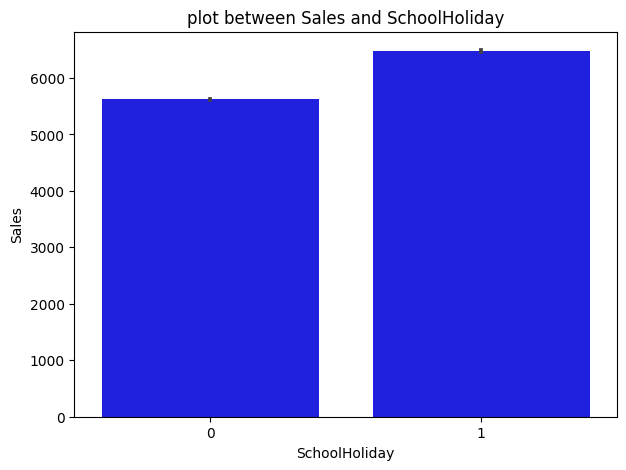

In [147]:
plt.figure(figsize=(7,5))
sns.barplot(x='SchoolHoliday',y="Sales",data=df,color='Blue')
plt.title('plot between Sales and SchoolHoliday')

###**Conclusion of EDA**

1) We plot graph for dependent variabel sales and we saw the positive skewed distribustion.

2) In sales and storetype plot we seen maximum sales done by storetype 1

3)sales and dayofweek plot we seen day 1 done maximum sales and day 7 almost done zero sales so we can say that day 1 is monday and day 7 is sunday

4) In promo and sales graph we seen promotion are helped to increges sales.

5) In stateholiday and sales plot we seen when stateholiday sales are less as compear to nonstateholiday

6)Plot between Sales and SchoolHoliday we saw when schoolholiday the sales are maximum.


## ***5. Feature Engineering & Data Pre-processing***

<Axes: >

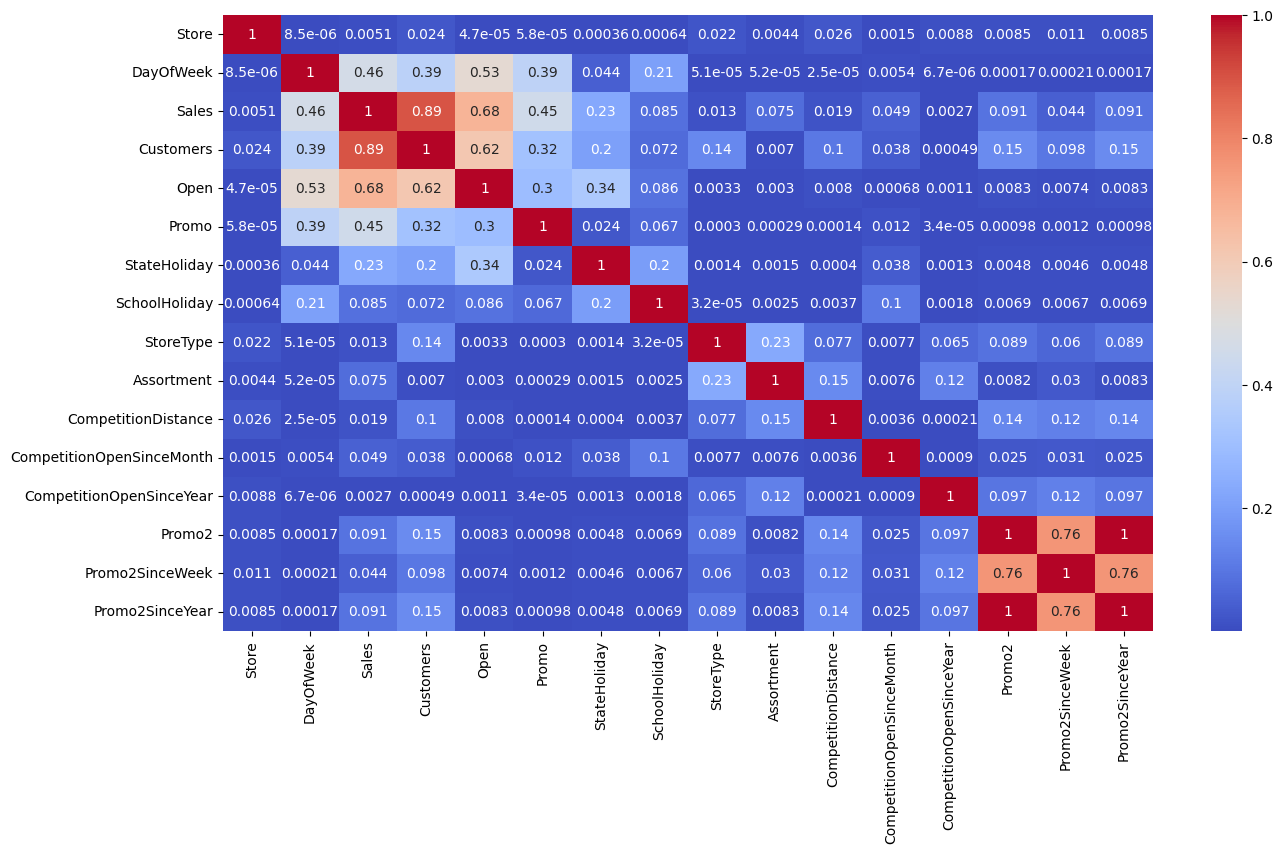

In [148]:

 #Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [149]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [150]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,3.698820e+00
1,DayOfWeek,4.104634e+00
2,Customers,5.236586e+00
3,Open,9.374439e+00
4,Promo,1.917193e+00
5,StateHoliday,1.187974e+00
6,SchoolHoliday,1.330848e+00
7,StoreType,1.940267e+00
8,Assortment,2.045386e+00
9,CompetitionDistance,1.589466e+00


In [151]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales',"Promo2"]]])

,variables,VIF
0,Store,3.696388
1,DayOfWeek,4.104282
2,Customers,5.236066
3,Open,9.373305
4,Promo,1.917150
5,StateHoliday,1.187974
6,SchoolHoliday,1.330831
7,StoreType,1.934410
8,Assortment,2.039789
9,CompetitionDistance,1.583028


In [152]:
# So we have two dataset df & where sales are 0 and stores are temporarily  closed  is ndf

In [153]:
ndf.shape

(844392, 18)

In [154]:
# we have one columns PromoInterval that columns we change into dummies
ndf=pd.get_dummies(ndf,columns=['PromoInterval'])

In [155]:
ndf.to_csv('cleandata.csv',index=False)

## ***7. ML Model Implementation***

In [156]:
# import 
from scipy.stats import  zscore
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2 ,mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

## **MODEL 1**

We create model for sales=0 row drop  dataset (ndf) 


###  Implementing Linear Regression

In [157]:
# dependent variabel
dependent_variabel = "Sales"

In [158]:
# independent variabel
independent_variabel = list(ndf.columns.drop(["Store",'Sales','Date','Promo2SinceYear']))

In [159]:
# list of independent variabels
independent_variabel

['DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'PromoInterval_0',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

In [160]:
X=ndf[independent_variabel].values

y=ndf[dependent_variabel].values

In [161]:
 # spliting data for train and test
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(675513, 17)
(168879, 17)


###  **Implementing Linear Regression**


In [162]:
reg = LinearRegression().fit(X_train, y_train)

In [163]:
reg.score(X_train, y_train)

0.7632403054971308

In [164]:
reg.coef_

array([-6.85928936e+01,  6.35117848e+00, -1.27862165e-11,  1.29697007e+03,
       -1.28080028e+03,  3.62744449e+01,  2.77414571e+02,  2.21496202e+02,
        2.90257630e-02,  2.99511810e+01,  8.43161755e-02, -4.31842624e+01,
        1.24571492e+01,  4.31842624e+01,  3.05376363e+01,  1.37834346e+02,
       -2.11556244e+02])

In [165]:
len(reg.coef_)

17

In [166]:
reg.intercept_

612.2672863968573

In [167]:
y_pred = reg.predict(X_test)

In [168]:
y_pred

array([5271.24086764, 4772.85240298, 7186.82158482, ..., 4148.85487201,
       7838.48679257, 5409.85330269])

In [169]:
y_test

array([ 5495,  5472,  7969, ...,  2938, 10413,  5828])

In [170]:
y_pred_train=reg.predict(X_train)
y_pred_train

array([5442.98477126, 6726.02987697, 6774.24048543, ..., 7971.77352497,
       6874.35239085, 6125.63986535])

In [171]:
y_train

array([5409, 7339, 7807, ..., 4817, 6194, 5862])

In [172]:
# calculate MSE & RMSE

MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 2268611.1740032807
RMSE : 1506.1909487190794


In [173]:
# calculate r2
r2 = r2_score(y_test,y_pred)
print("R2 :" ,r2)


R2 : 0.7631565218667622


### **Implementing Lasso regression**

In [174]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.001 , max_iter= 1000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [175]:
lasso.score(X_train, y_train)

0.7632403054466365

In [176]:
y_pred_l = lasso.predict(X_test)

In [177]:
MSE  = mean_squared_error(y_test,y_pred_l)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


MSE : 2268611.1886184807
RMSE : 1506.1909535707885


In [178]:
# calculate r2
r2 = r2_score(y_test,y_pred)
print("R2 :" ,r2)


R2 : 0.7631565218667622


When we assume alpha value 0.001 r2 value  is 0.76315

Now we find best alpha value useing GridSearchCV 

In [179]:
lasso = Lasso()
parameters = {'alpha': [0.1,100,0.1]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(), param_grid={'alpha': [0.1, 100, 0.1]},
             scoring='neg_mean_squared_error')

In [180]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -2285184.3279709625


In [181]:
lasso  = Lasso(alpha=0.01 , max_iter= 1000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [182]:
lasso.score(X_train, y_train)

0.7632403004476935

In [183]:
y_pred_l = lasso.predict(X_test)

In [184]:
MSE  = mean_squared_error(y_test,y_pred_l)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


MSE : 2268611.3637753734
RMSE : 1506.1910117164334


In [185]:
# calculate r2
r2 = r2_score(y_test,y_pred)
print("R2 :" ,r2)


R2 : 0.7631565218667622


The best value of alpha is 0.01 and the r2 is 0.76315

### **Implementing Elastic net Regression**

In [186]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.5)

In [187]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.01)

In [188]:
elasticnet.score(X_train, y_train)

0.7630377051536315

In [189]:
y_pred_en = elasticnet.predict(X_test)

In [190]:
MSE  = mean_squared_error(y_test,y_pred_l)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


MSE : 2268611.3637753734
RMSE : 1506.1910117164334


In [191]:
# calculate r2
r2 = r2_score(y_test,y_pred)
print("R2 :" ,r2)


R2 : 0.7631565218667622


When we assume alpha value 0.001 r2 value  is 0.76315

Now we find best alpha value useing GridSearchCV 

In [192]:
elastic = ElasticNet()
parameters = {'alpha': [0.1,100,0.1],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 100, 0.1],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [193]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [194]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1, 'l1_ratio': 0.8}

Using  {'alpha': 0.1, 'l1_ratio': 0.8}  the negative mean squared error is:  -2290809.731636081


In [195]:
MSE  = mean_squared_error(y_test,y_pred_l)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


MSE : 2268611.3637753734
RMSE : 1506.1910117164334


In [196]:
# calculate r2
r2 = r2_score(y_test,y_pred)
print("R2 :" ,r2)


R2 : 0.7631565218667622


The best value of alpha is 0.1 and l1_ratio is 0.8 the r2 is 0.76315

### **Decision Trees Regression**

In [197]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [198]:
y_pred_t=decision_tree.predict(X_test)
y_train_t=decision_tree.predict(X_train)

In [199]:
MSE  = mean_squared_error(y_test,y_pred_t)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


MSE : 2013547.8687388108
RMSE : 1418.9953730505292


In [200]:
# calculate r2
r2 = r2_score(y_test,y_pred_t)
print("R2 :" ,r2)


R2 : 0.7897851839553804


In decision trees regression we have R2 value is 0.78978 

## **MODEL 2**

Now we create model for whole dataset (df)


In [201]:
# we have one columns PromoInterval that columns we change into dummies
df=pd.get_dummies(df,columns=['PromoInterval'])

In [202]:
# So now we define dependent and independent variabels
dependent_variabel="Sales"

independent_variabel=df.columns.drop(['Store',"Promo2SinceYear","Date","Sales"])

In [203]:
# creating data for dependent and independent variabels
U=df[independent_variabel].values

v=df[dependent_variabel].values

In [204]:
# Now we split the data for train and test
U_train, U_test, v_train, v_test = train_test_split( U,v , test_size = 0.2, random_state = 0) 
print(U_train.shape)
print(U_test.shape)

(813767, 17)
(203442, 17)


###  Implementing Linear Regression

In [205]:
# we sacaling x values
scaler=StandardScaler()
U_train=scaler.fit_transform(U_train)
U_test=scaler.transform(U_test)

In [206]:
#fiting data in to model 
reg = LinearRegression().fit(U_train, v_train)

In [207]:
v_pred=reg.predict(U_test)
v_pred

array([ 7101.66614705, 12611.33802205,  9204.59583455, ...,
        6938.9200533 ,  5999.9747408 ,  4007.9825533 ])

In [208]:
reg.score(U_train, v_train)

0.8677978490444807

In [209]:
MSE  = mean_squared_error(v_test,v_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

# calculate r2
r2 = r2_score(v_test,v_pred)
print("R2 :" ,r2)


MSE : 1944268.5102740775
RMSE : 1394.370291663616
R2 : 0.8684236859866605


R2 score in linear regression model is 0.86842

###  Decision tree Regression

In [210]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(U_train,v_train)

v_pred_t=decision_tree.predict(U_test)
v_train_t=decision_tree.predict(U_train)

MSE  = mean_squared_error(v_test,v_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(v_test,v_pred)
print("R2 :" ,r2)


MSE : 1944268.5102740775
RMSE : 1394.370291663616
R2 : 0.8684236859866605


In decision tree regressor R2 score is 0.8684

#**Conclusion**

**MODEL 1(ndf)**

In this dataset we saw that Sales columns contains 172817 rows with 0 sales.so we remove the row where sales is zero and creat new dataset (ndf) and tried to train our model. we used various algorithms and got accuracy  score around 78%


**MODEL 2(df)**  
We have one more dataset(df) including sales=0.so we trained another model using various algorithums and we got accuracy near about 86% which is far better than previous model

So we come to conclusion that removing sales=0 rows actually remove lot of information from dataset as it has 172817 rows which is quite large and therefore we decided not to remove those values.We got our best R2 score is 0.86842 for Decision Tree Regression.


#**THANKS**